In [4]:
import cv2
import matplotlib.pyplot as plt

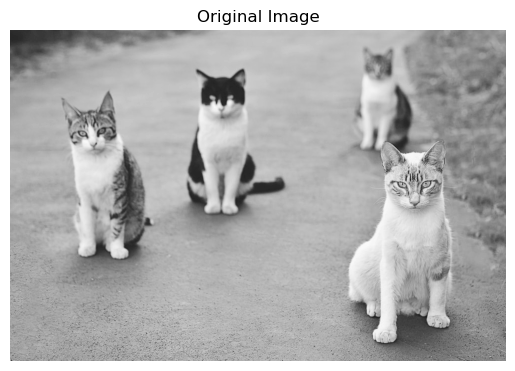

In [13]:
image = cv2.imread(r'C:\Users\DELL\Downloads\cats.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

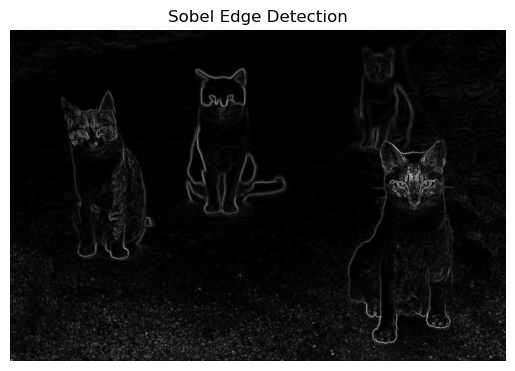

In [14]:
#2 Techniques in Edge Detection
#Sobel Edge Detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.hypot(sobel_x, sobel_y)
sobel_edges = np.uint8(255 * sobel_edges / np.max(sobel_edges))

# Display Sobel edge detection result
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

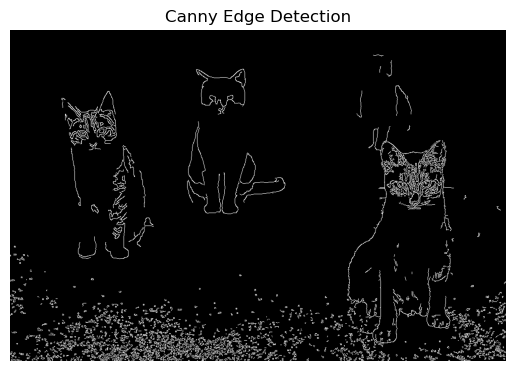

In [15]:
#2.Canny Edge Detection
import cv2
import matplotlib.pyplot as plt

# Apply Canny edge detection
canny_edges = cv2.Canny(image, 100, 200)

# Display Canny edge detection result
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

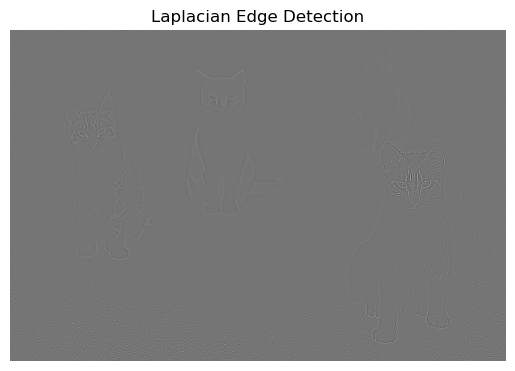

In [16]:
#3. Laplacian Edge Detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Laplacian edge detection
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
laplacian_edges = np.uint8(255 * (laplacian_edges - np.min(laplacian_edges)) / np.ptp(laplacian_edges))

# Display Laplacian edge detection result
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

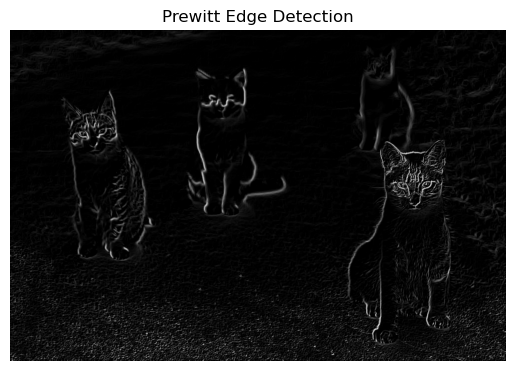

In [24]:
#Prewitt Edge Detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = r'C:\Users\DELL\Downloads\cats.jpg'  # Update this path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    raise ValueError("Image not found. Please check the path.")

# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

# Apply Prewitt edge detection
prewitt_x_edges = cv2.filter2D(image, -1, prewitt_x)
prewitt_y_edges = cv2.filter2D(image, -1, prewitt_y)

# Compute the magnitude of the gradient
prewitt_edges = np.hypot(prewitt_x_edges, prewitt_y_edges)

# Normalize the gradient magnitude to avoid overflow
max_val = np.max(prewitt_edges)
if max_val > 0:
    prewitt_edges = np.uint8(255 * (prewitt_edges / max_val))
else:
    prewitt_edges = np.zeros_like(prewitt_edges, dtype=np.uint8)

# Display Prewitt edge detection result
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()


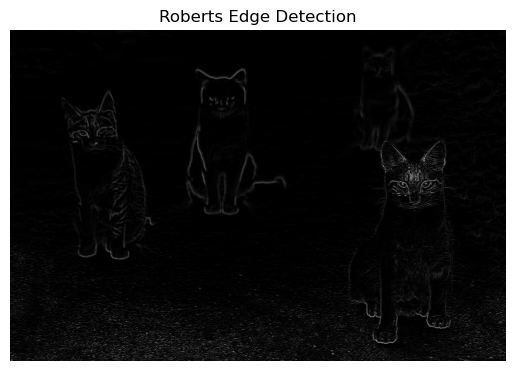

In [18]:
#5.Roberts Edge Detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define Roberts kernels
roberts_x = np.array([[ 1, 0],
                      [ 0, -1]])

roberts_y = np.array([[ 0, 1],
                      [-1, 0]])

# Apply Roberts edge detection
roberts_x_edges = cv2.filter2D(image, -1, roberts_x)
roberts_y_edges = cv2.filter2D(image, -1, roberts_y)
roberts_edges = np.hypot(roberts_x_edges, roberts_y_edges)
roberts_edges = np.uint8(255 * roberts_edges / np.max(roberts_edges))

# Display Roberts edge detection result
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')
plt.show()

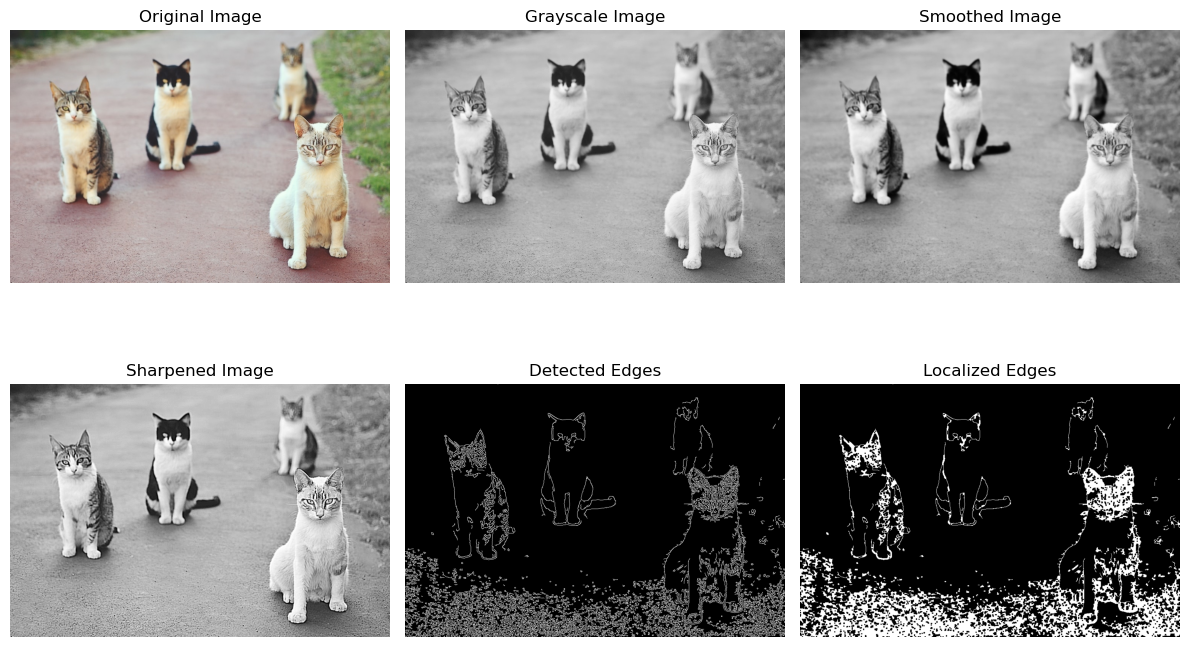

In [22]:
#Steps for edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\DELL\Downloads\cats.jpg' # Replace with your image file
image = cv2.imread(image_path)

# 1. Smoothing
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply GaussianBlur to reduce noise
smoothed_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 2. Sharpening
# Define a sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
# Apply sharpening filter
sharpened_image = cv2.filter2D(smoothed_image, -1, sharpening_kernel)

# 3. Detection
# Apply Canny edge detector
edges = cv2.Canny(sharpened_image, 100, 200)

# 4. Localization
# To improve localization, you could apply dilation and erosion
# Dilation to enhance edges
dilated_edges = cv2.dilate(edges, None, iterations=1)
# Erosion to refine edges
localized_edges = cv2.erode(dilated_edges, None, iterations=1)

# Display the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Grayscale image
plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Smoothed image
plt.subplot(2, 3, 3)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

# Sharpened image
plt.subplot(2, 3, 4)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

# Detected edges
plt.subplot(2, 3, 5)
plt.title('Detected Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Localized edges
plt.subplot(2, 3, 6)
plt.title('Localized Edges')
plt.imshow(localized_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

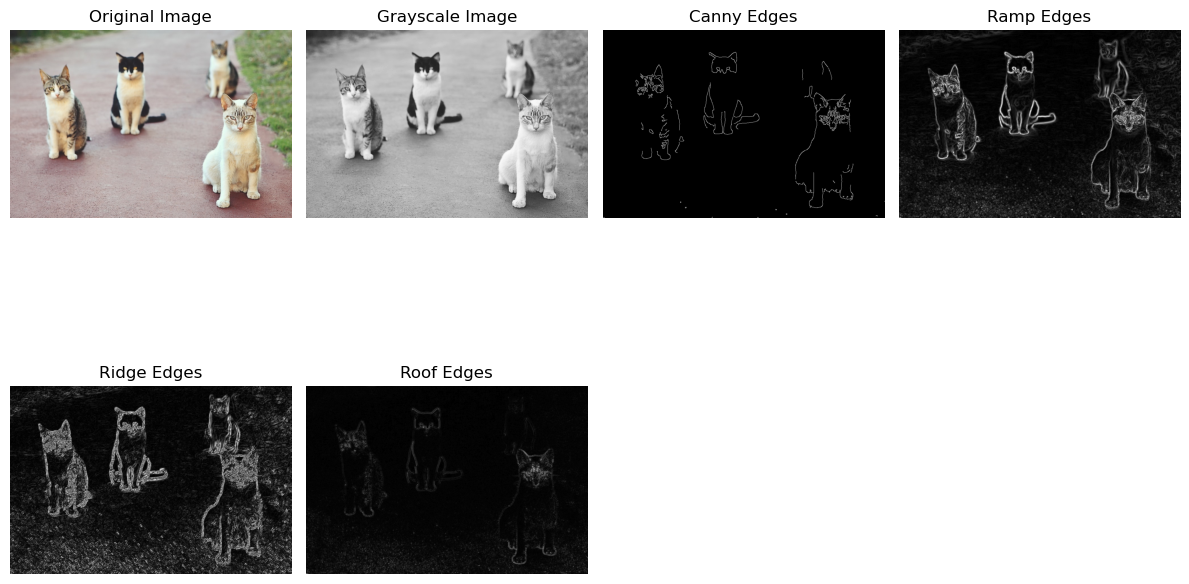

In [21]:
#Types of Edge
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\DELL\Downloads\cats.jpg' # Replace with your image file
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 1. Step Edge Detection
# Apply Canny Edge Detector
canny_edges = cv2.Canny(blurred_image, 100, 200)

# 2. Ramp Edge Detection
# Apply Sobel Operator to detect gradients
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
ramp_edges = np.sqrt(sobel_x**2 + sobel_y**2)
ramp_edges = np.uint8(ramp_edges)

# 3. Ridge Edge Detection
# Applying a combination of Sobel and Gaussian Blur to enhance ridge features
ridge_blur = cv2.GaussianBlur(ramp_edges, (3, 3), 0)
ridge_edges = cv2.Sobel(ridge_blur, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(ridge_blur, cv2.CV_64F, 0, 1, ksize=3)
ridge_edges = np.uint8(np.abs(ridge_edges))

# 4. Roof Edge Detection
# Using a simple Laplacian filter to enhance roof-like structures
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
roof_edges = np.uint8(np.abs(laplacian))

# Display the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Grayscale image
plt.subplot(2, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Canny Edges (Step Edge)
plt.subplot(2, 4, 3)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

# Ramp Edges (Sobel Gradient Magnitude)
plt.subplot(2, 4, 4)
plt.title('Ramp Edges')
plt.imshow(ramp_edges, cmap='gray')
plt.axis('off')

# Ridge Edges
plt.subplot(2, 4, 5)
plt.title('Ridge Edges')
plt.imshow(ridge_edges, cmap='gray')
plt.axis('off')

# Roof Edges
plt.subplot(2, 4, 6)
plt.title('Roof Edges')
plt.imshow(roof_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()